# Open Ended Lab 
## 2022-SE-18



# Classification of MNIST Handwritten Digits Using Machine Learning 
###  Objective 
The goal of this open-ended lab is to allow students to experiment with different classification 
models and compare their performance on the MNIST dataset. Students will: 
- Understand the structure of the dataset. 
- Train various machine learning models. 
- Evaluate the models and analyze their performance. 
- Document their findings in a detailed report. 
###  Dataset Description 
The dataset consists of handwritten digits represented as 28x28 pixel grayscale images. Each 
image is labeled with a corresponding digit (0-9). The dataset has been preprocessed as follows: 
- Flattened images into a 1D vector of 784 features (28x28 = 784). 
- Split into training and testing sets. 
- Stored in CSV files (mnist_train.csv and mnist_test.csv). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')
np.random.seed(42)

In [2]:
# Load datasets
train_df = pd.read_csv('mnist_train.csv')  
test_df = pd.read_csv('mnist_test.csv')

### combining the data sets
we combine the data sets because the No of column in train and test data sets are (28*28 = 783). which is hard to preprocess seperatly and to reduce the features seperatly. Because if we apply Pca (which is used for features separtion in machine learning) to train data sets it cannot capture the same pattern to follow when reduce the features for testing data set. 
so for this reason and for over easyness we combine the training and testing data sets.

In [3]:
# Combine datasets
combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
print("Combined Data Shape:", combined_df.shape)

Combined Data Shape: (70000, 785)


In [4]:
missing_values = combined_df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Show only columns with NaNs

print(missing_values.sort_values(ascending=False))

Series([], dtype: int64)


In [5]:
# X and Y
X = combined_df.drop('label', axis=1)
y = combined_df['label']

#### standard scaling


In [6]:
from sklearn.preprocessing import StandardScaler

# Define the numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create a StandardScaler instance
scaler = StandardScaler()
# Fit and transform the numerical columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

### using PCA to Reduce the features

In [6]:
# Apply PCA to reduce features while keeping 95% of the variance
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X)

# Check how many features remain after PCA
print("Original Feature Shape:", train_df.shape)
print("Reduced Feature Shape:", X_pca.shape)

Original Feature Shape: (60000, 785)
Reduced Feature Shape: (70000, 154)


In [7]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (56000, 154)
Testing Set Shape: (14000, 154)


### define and Initialize the Models

In [ ]:
# 📌 Define and initialize models
model_options = {
    "🔹 Logistic Regression": LogisticRegression(max_iter=1000),
    "🔹 K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "🔹 Naïve Bayes": GaussianNB(),
    "🔹 Artificial Neural Network (ANN)": MLPClassifier(max_iter=1000)
}

# 🚀 Train models and evaluate performance
evaluation_results = {}

for model_name, clf in model_options.items():
    clf.fit(X_train, y_train)  # Training the model 🎯
    y_pred = clf.predict(X_test)  # Making predictions 🔍
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    evaluation_results[model_name] = accuracy
    
    # Display results 📊
    print(f"✅ {model_name} Accuracy: {accuracy:.3f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Tune Neural Network 🧠⚡
ann_param_grid = {
    'hidden_layer_sizes': [(256, 128), (128, 128, 64), (256, 128, 64)],  # 🏗️ Trying different layer structures
    'learning_rate_init': [0.0005, 0.001, 0.003],  # 🚀 Exploring better learning rates
    'activation': ['relu', 'tanh']  # 🔄 Comparing different activation functions
}

# Perform Grid Search 🔍
ann_grid_search = GridSearchCV(MLPClassifier(max_iter=50, solver='adam', random_state=42), 
                               ann_param_grid, cv=3, n_jobs=-1)
ann_grid_search.fit(X_train[:5000], y_train[:5000])  # Subset for faster processing ⚡

# Get the best model 🏆
best_mlp_model = ann_grid_search.best_estimator_
y_pred_best_mlp = best_mlp_model.predict(X_test)

# Evaluate performance 📊
evaluation_results['optimized ann'] = accuracy_score(y_test, y_pred_best_mlp)
print(f'Optimized MLP Accuracy: {evaluation_results['optimized ann']:.3f}')
print(f'Best Hyperparameters: {ann_grid_search.best_params_}')

✅ 🔹 Logistic Regression Accuracy: 0.921
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1381
           1       0.95      0.98      0.96      1575
           2       0.93      0.89      0.91      1398
           3       0.90      0.89      0.90      1428
           4       0.93      0.92      0.92      1365
           5       0.88      0.87      0.87      1263
           6       0.93      0.95      0.94      1375
           7       0.94      0.95      0.94      1459
           8       0.89      0.88      0.89      1365
           9       0.90      0.89      0.90      1391

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

[[1338    0    1    2    3   16    9    1    9    2]
 [   0 1538    6    9    0    7    1    7    5    2]
 [  16   11 1248   20   13    7   29   17   29    8]
 [   8    5   32 1272    0   50    5   16 

## optimization of ANN Model

In [14]:
# Tune Neural Network 🧠⚡
ann_param_grid = {
    'hidden_layer_sizes': [512, 256, 128],  # 🏗️ Trying different layer structures
    'learning_rate_init': [0.0005, 0.001, 0.003],  # 🚀 Exploring better learning rates
    'activation': ['relu', 'tanh']  # 🔄 Comparing different activation functions
}

# Perform Grid Search 🔍
ann_grid_search = GridSearchCV(MLPClassifier(max_iter=1200, solver='adam', random_state=42), 
                               ann_param_grid, cv=3, n_jobs=-1)
ann_grid_search.fit(X_train[:5000], y_train[:5000])  # Subset for faster processing ⚡

# Get the best model 🏆
best_mlp_model = ann_grid_search.best_estimator_
y_pred_best_mlp = best_mlp_model.predict(X_test)

# Evaluate performance 📊
evaluation_results['optimized ann'] = accuracy_score(y_test, y_pred_best_mlp)
print(f'Optimized MLP Accuracy: {evaluation_results['optimized ann']:.3f}')
print(f'Best Hyperparameters: {ann_grid_search.best_params_}')

Optimized MLP Accuracy: 0.920
Best Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': 512, 'learning_rate_init': 0.003}


## Evaluation  of Models

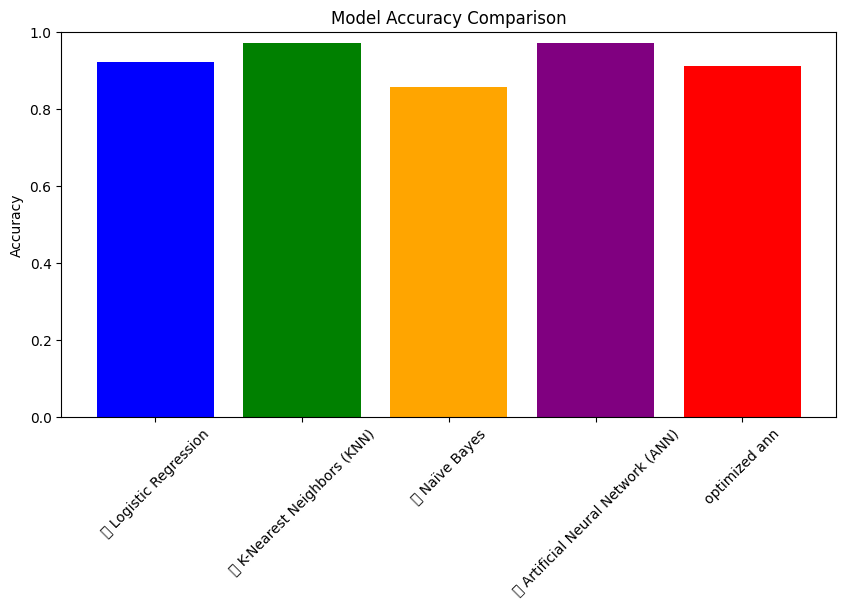

In [13]:
plt.figure(figsize=(10, 5))
plt.bar(evaluation_results.keys(), evaluation_results.values(), color=['blue', 'green', 'orange', 'purple', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()